# Hotel Business Sentiment Prediction Analysis


# Problem statement:

>> Currently customers are visiting our hotel and started dropping their reviews about the hotel and We have collected all the reviews.In this model basically we need to identify if the reviews are positive or negative.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import gensim
# downloading the list of stopword
from gensim.parsing.preprocessing import STOPWORDS
import string
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the train and test data
df_train=pd.read_csv('Project_1_train.csv')
df_test=pd.read_csv('Project_1_test.csv')

In [3]:
# Showing training dataset
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
# Showing test dataset
df_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


## Understanding Data:

>> **Features:**           
>>1) User_ID: This feature contains the unique id for each customer visiting the restaurant.          
>>2) Description: This feature contains the feedback customers are giving on the basis of the services provided to them.     
>>3) Browser_Used: This feature contains data about what browser customers are using to give their feedback.    
>>4) Device_Used: This feature contains information about what device customers are using.     

>> **Label:**       
>>Is_Response: Overall response about how a customer is thinking about the restaurant.(i.e 'happy' or 'not happy')      

In [5]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df_train.columns)
shape=df_train.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df_train.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df_train.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df_train.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df_train.columns.values:
    print("Number of unique values of {} : {}".format(col, df_train[col].nunique()))


Features Present in the Dataset: 
 Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

Total Number of Rows :  38932
Total Number of Features :  5


Data Types of Features :
 User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

Dataset contains any NaN/Empty cells :  False

Total number of empty rows in each feature:
 User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64 


Total number of unique values in each feature:
Number of unique values of User_ID : 38932
Number of unique values of Description : 38912
Number of unique values of Browser_Used : 11
Number of unique values of Device_Used : 3
Number of unique values of Is_Response : 2


## Data Preprocessing:

In [6]:
# Here I have made a function in which all the Data cleaning steps like removing punctuations, converting all the documents 
#        into lowercase, using lemmatization and stemming technique, filtering documents using Stopwords, 
#     all these type of data preprocessin steps are being perormed with th ehelp of the function defined below.

stemmer = SnowballStemmer("english")

def Processed_data(feedbacks):
    feedback_corpus = []
    for i in range(0, len(feedbacks)):
  
    # getting only words
        review = re.sub(r'\W', ' ', feedbacks[i])
    
    # getting rid of unwanted characters
        review=re.sub(r'\s+[a-zA-Z]\s+', ' ', review)
    
    # Removing extra whitespaces
        review=re.sub(r'\s+', ' ', review, flags=re.I)

    #converting all the letters of the review into lowercase
        review = review.lower()

    # splitting every words from the sentences
        review = review.split()
    
    # iterating through each words and checking if they are stopwords or not,
    # if they are stopwords we will not consider them furthermore and if they are not stopwords then, 
    # performing lemmatization operation on that particular word... 
        review = [stemmer.stem(WordNetLemmatizer().lemmatize(word,pos='v')) for word in review if not word in set(STOPWORDS)]

    # joining the review again
        review = ' '.join(review)
        #print(review)
        feedback_corpus.append(review)
        #print(feedback_corpus)
    return feedback_corpus

In [7]:
# Inserting the processed data into the dataframe    
df_train['Description_clean']=Processed_data(df_train['Description'])

In [8]:
# DataFrame after all the preprocessing steps like, removing punctuations,converting into lower case,
# Lematization and filtered using stopwords 
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_clean
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,room kind clean strong smell dog general avera...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,stay crown plaza april april staff friend atte...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,book hotel hotwir lowest price get desk manag ...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stay husband son way alaska cruis love hotel g...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,girlfriend stay celebr th birthday plan weeken...


In [9]:
df_test['Description_clean']=Processed_data(df_test['Description'])

In [10]:
# DataFrame after all the preprocessing steps like, removing punctuations,converting into lower case,
# Lemaatization and filtered using stopwords 
df_test.head()

,User_ID,Description,Browser_Used,Device_Used,Description_clean
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,look motel close proxim tv tap dr phil choos d...
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop,walk distanc madison squar garden penn subway ...
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,visit seattl busi spend night vintag park grea...
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,hotel locat excel room clean suit bedroom apar...
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,hotel awesom love servic anthoni great guy des...


# EDA

**Although our prediction does not depends on what kind of device and browser a person use in order to predict the sentiment,I have just use these features in order to show the popularity of a browser and device among these persons.**

In [11]:
# counts representing popularity of search browser among different people.
print("Number of persons using different browsers:\n",df_train['Browser_Used'].value_counts())

Number of persons using different browsers:
 Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64


In [12]:
# counts representing popularity of Device among different people.
print("Number of persons using different Devices:\n",df_train['Device_Used'].value_counts())

Number of persons using different Devices:
 Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64


In [13]:
# counts representing number of persons who are happy or Unhappy.
print("Number of counts of persons Who are either happy or unhappy:\n",df_train['Is_Response'].value_counts())

Number of counts of persons Who are either happy or unhappy:
 happy        26521
not happy    12411
Name: Is_Response, dtype: int64


 ***************************************** Graph showing Browser popularity********************************


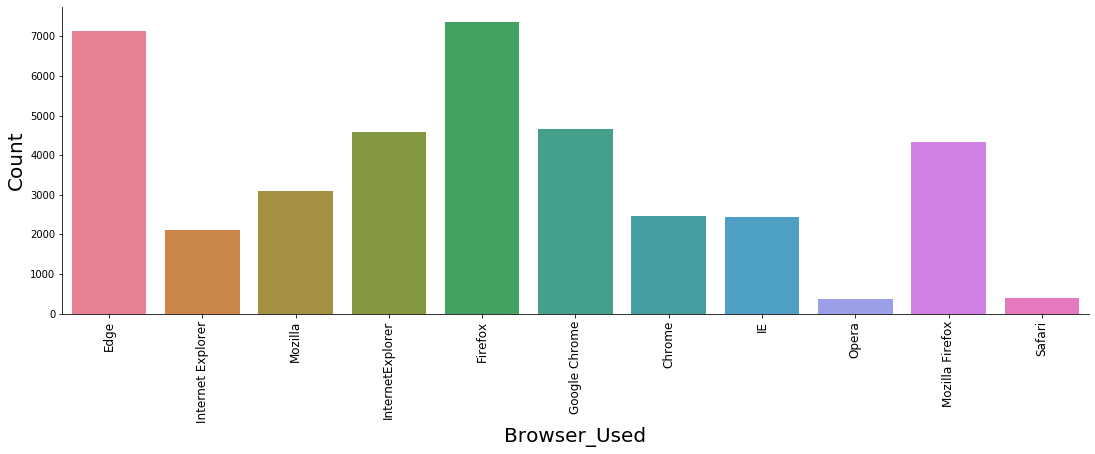

 ****************************************** Graph showing Device popularity*********************************


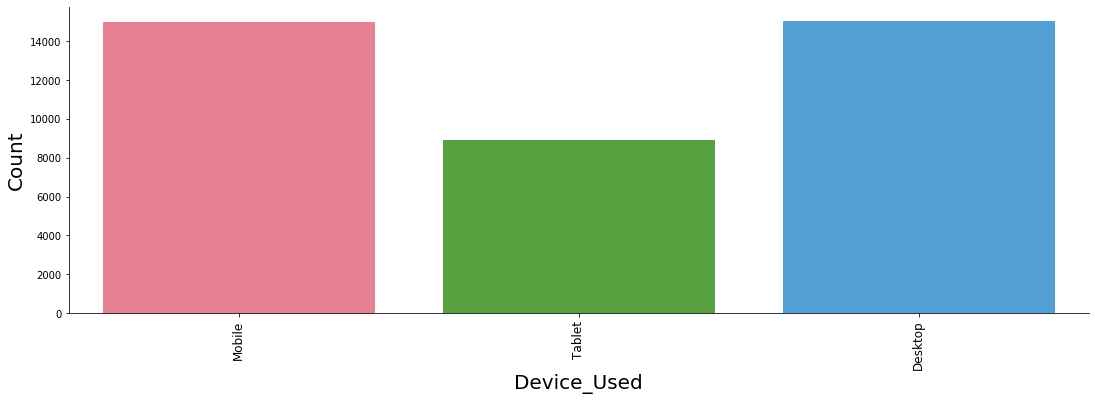

 *********************************************People sentiment counts*****************************************


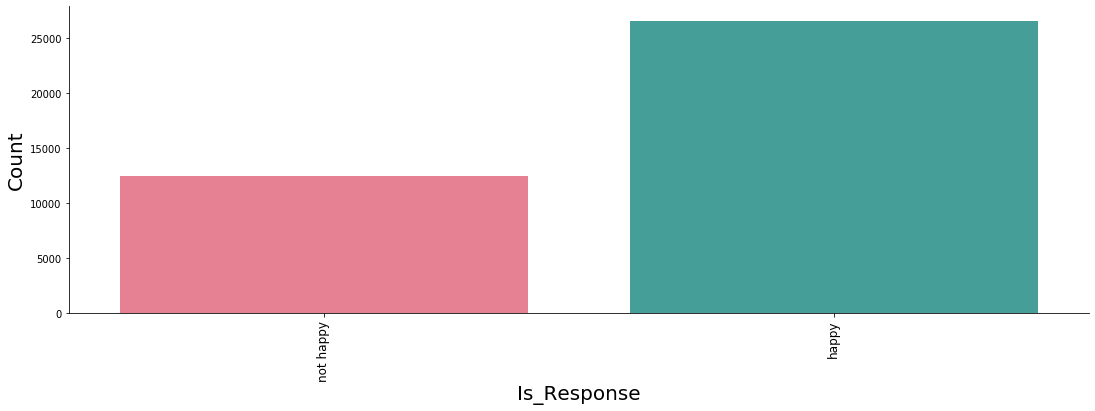

In [14]:
# For loop to plot the graphs of different features with respect to the number of count of each unique instance...
for j,i in enumerate(df_train[df_train.columns[2:5]]):
    if j==0:
        print(" ***************************************** Graph showing Browser popularity********************************")
    if j==1:
        print(" ****************************************** Graph showing Device popularity*********************************")
    if j==2:
        print(" *********************************************People sentiment counts*****************************************")
    sns.catplot(x=i,
                data=df_train,
                kind='count',
                height=5,
                aspect=3,
                palette='husl',
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.show()

In [15]:
# Making a wordcloud function in order to show the happy and unhappy words from the dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'white',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='g')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} words")
    plt.show()

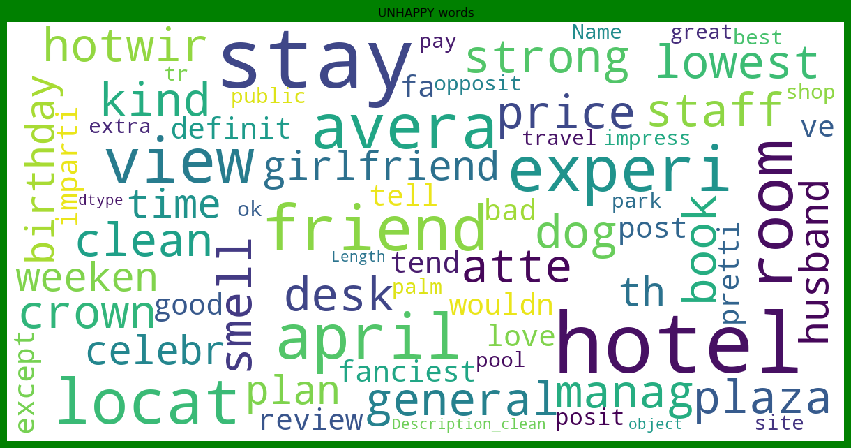

In [16]:
# Unhappy words in training data
Display_wordcloud(df_train['Description_clean'][df_train["Is_Response"]=="not happy"],"UNHAPPY")

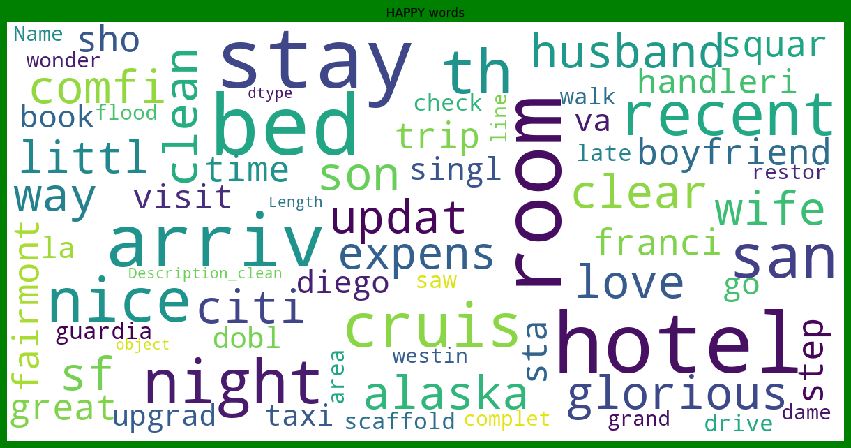

In [17]:
# happy words in training data
Display_wordcloud(df_train['Description_clean'][df_train["Is_Response"]=="happy"],"HAPPY")

In [18]:
# Dropping columns from which not much information is gained in order to predict the sentiments...
df_train.drop(columns=['Description','User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [19]:
# Using Label encoder to convert 'Is_Response' feature values in categorical format for further evaluation...
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
List_resp=['Is_Response']
for i in List_resp:
    df_train[i]=le.fit_transform(df_train[i].astype(str))
df_train

,Is_Response,Description_clean
0,1,room kind clean strong smell dog general avera...
1,1,stay crown plaza april april staff friend atte...
2,1,book hotel hotwir lowest price get desk manag ...
3,0,stay husband son way alaska cruis love hotel g...
4,1,girlfriend stay celebr th birthday plan weeken...
...,...,...
38927,0,arriv late night walk check area complet flood...
38928,1,posit impress locat public park opposit site s...
38929,1,travel friend shop locat great best room avera...
38930,1,experi ok pay extra view pool get view palm tr...


In [20]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the train documents into vectors so that machine can do further processing
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=5,smooth_idf=False)
    return tfid.fit_transform(text)

In [21]:
# Inserting vectorized values in a variable x, which will be used in training the model 
x=Tf_idf_train(df_train['Description_clean'])

In [22]:
# checking the shape of the data which is inserted in x which will be used for model training.
print("Shape of x: ",x.shape)

# Assigning the label in y and checking it's shape
y = df_train['Is_Response'].values
print("Shape of y: ",y.shape)

Shape of x:  (38932, 9650)
Shape of y:  (38932,)


In [ ]:
# 
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# creating the model
model = MultinomialNB()

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# checking the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Model Training

In [25]:
# Importing useful libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Ensemble Techniques...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
#........Defining Instances For Differnt Models.......
# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances for different Classifiers
LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()

In [26]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('DecisionTreeClassifier',DT))
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB()',MNB))


In [27]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** DecisionTreeClassifier *****************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Max Accuracy Score corresponding to Random State  56 is: 0.7571061643835616


Learning Score :  0.9998165272273595
Accuracy Score :  0.7542808219178082
Cross Val Score :  0.7091107430914577
roc auc score :  0.7120330600507139


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      7957
           1       0.62      0.60      0.61      3723

    accuracy                           0.75     11680
   macro avg       0.72      0.71      0

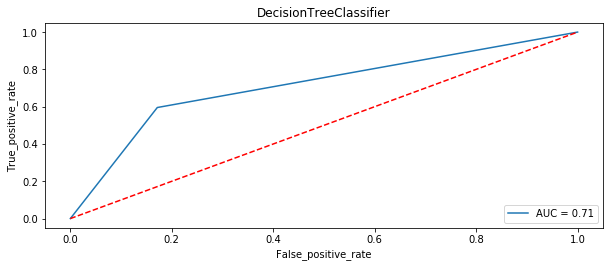

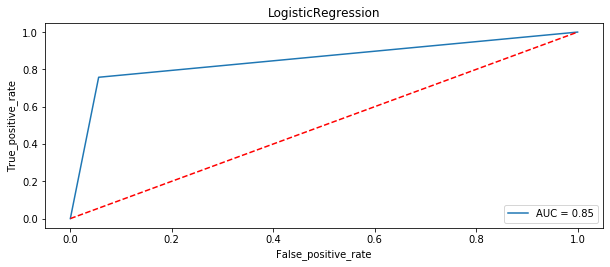

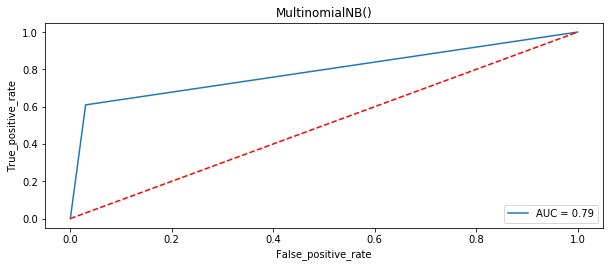

In [28]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [29]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,DecisionTreeClassifier,99.9817,75.4281,70.9111,71.2033
1,LogisticRegression,90.0741,88.476,93.8937,85.0961
2,MultinomialNB(),85.9937,85.5051,92.1594,78.9781


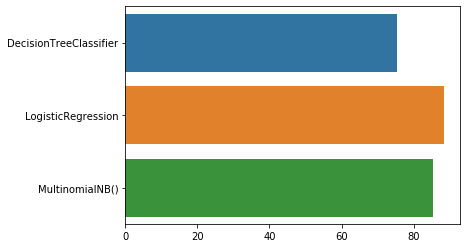

In [30]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

## Using GridSearch CV

**As we can see that both Multinomial nb and Logistic Regression are performing well thus I will use Gridsearch cv on both of these models**

In [31]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [ ]:
#.........Grid Search for LogisticRegression......
import numpy as np
lg=LogisticRegression()
parameters={"C": np.logspace(-4, 4, 20),"solver": ["liblinear"],'penalty' : ['l1', 'l2']}
grid_cv(lg,parameters,'f1')

In [ ]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clflg = LogisticRegression(C= 1.623776739188721, solver='liblinear',penalty= 'l2')
max_acc_score(clflg,x,y)

In [ ]:
#.........Grid Search for MultinomialNB......
mnb=MultinomialNB()
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid_cv(mnb,parameters,'f1')

In [ ]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfmnb = MultinomialNB(alpha=0.1)
max_acc_score(clfmnb,x,y)

## After all this process conclusion is that LogisticRegression performing well because of high roc_auc score

# Testing Model:

**Now we know that our model is performing well using Logistic regression thus I will use all the Data cleaning and preprocessing steps in order to use our model to predict the People sentiments for the test data**

In [ ]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the testdocuments into vectors so that machine can do further processing
def Tf_idf_test(text):
    tfid = TfidfVectorizer(max_features=9650,smooth_idf=False)
    return tfid.fit_transform(text)

In [ ]:
x=Tf_idf_test(df_test['Description_clean'])

In [ ]:
x.shape

In [ ]:
# Here I am making prediction using Logistic regression as this model is performing well in terms of accuracy, roc_auc score...
model = LogisticRegression(C= 1.623776739188721, solver='liblinear',penalty= 'l2')

# loading the train data in x_train and y_train for model training...
x_train=Tf_idf_train(df_train['Description_clean'])
y_train=df_train['Is_Response']

# loading the test data in x_test for prediction
x_test=Tf_idf_test(df_test['Description_clean'])

# fitting the training data to the model
model.fit(x_train, y_train)

# predicting the test set results and storing it in y_pred..
y_pred = model.predict(x)


In [ ]:
# replacing the testing values with their original meaning(i.e "happy" with "0" and "not happy" with "1")...
a=[]
for i in y_pred:
    if i==0:
        a.append("happy")
    elif i==1:
        a.append("not happy")

In [ ]:
# Assigning the predicted value in the dataframe 
df_test['Predicted value']=a
df_test

### Displaying words using wordcloud

In [ ]:
# Unhappy words in training data
Display_wordcloud(df_test['Description'][df_test["Predicted value"]=="not happy"],"UNHAPPY")

In [ ]:
# Happy words in training data
Display_wordcloud(df_test['Description'][df_test["Predicted value"]=="happy"],"HAPPY")

In [ ]:
# Displaying number of counts for both sentiments..
df_test['Predicted value'].value_counts()

In [ ]:
# Displaying People sentiments using catplot
sns.catplot(x='Predicted value',
                data=df_test,
                kind='count',
                palette='husl',
               )
plt.xticks(rotation=90,fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=20)
plt.xlabel('People sentiments',fontsize=20)
plt.title("People Sentiments for the test Data")
plt.show()

In [ ]:
# Saving the Predicted values in csv file
df1=pd.DataFrame()
df1['User Id']=df_test['User_ID']
df1['Description']=df_test['Description']
df1['Predicted_Sentiments']=df_test['Predicted value']
#df1.to_csv('Project_1_Hotel_Buisness_Sentiment.csv')

In [ ]:
df1